# Prediction and Analysis of Coronavirus (COVID19) | Priya Bannur PB 23

### Tasks covered:
1. Linear regression
2. Polynomial regression

## Importing essential libraries

In [1]:
# Mathemetical libraries
import math

# Data storage, manipulation, analysis
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Data visualization
import matplotlib.pyplot as plt

In [2]:
# storing covid-19 dataset into dataframe
dataset = pd.read_csv('covid19-dataset.csv', parse_dates=['Date'])

# displaying 5 random data samples
dataset.sample(5)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
5983,Channel Islands,United Kingdom,49.3723,-2.3644,2020-02-13,0,0,0
14112,NaN,Uzbekistan,41.3775,64.5853,2020-03-15,1,0,0
11439,NaN,Nigeria,9.0820,8.6753,2020-03-05,1,0,0
15731,Queensland,Australia,-28.0167,153.4000,2020-03-22,259,0,8
3133,NaN,MS Zaandam,0.0000,0.0000,2020-02-02,0,0,0


In [3]:
# sorting data as per date

datesorted = dataset.sort_values('Date')
datesorted.head().style.hide_index()

Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
nan,Afghanistan,33,65,2020-01-22 00:00:00,0,0,0
Aruba,Netherlands,12.5186,-70.0358,2020-01-22 00:00:00,0,0,0
Curacao,Netherlands,12.1696,-68.99,2020-01-22 00:00:00,0,0,0
Sint Maarten,Netherlands,18.0425,-63.0548,2020-01-22 00:00:00,0,0,0
nan,Netherlands,52.1326,5.2913,2020-01-22 00:00:00,0,0,0


## Linear Regression

In [4]:
X=datesorted[["Confirmed"]]
Y=datesorted[["Deaths"]]

In [5]:
# Reshaping data into an array for Linear Regression

x=np.reshape(X, (-1, 1))
y=np.reshape(Y, (-1, 1))

In [6]:
# Modeling Linear Regression 

regressor = LinearRegression()
regressor.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

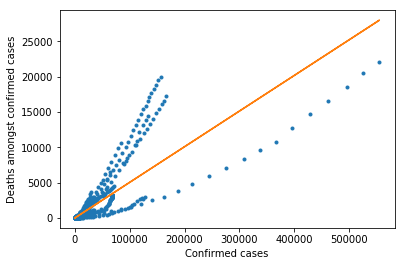

In [7]:
# Plotting the Line of regression

plt.xlabel("Confirmed cases")
plt.ylabel("Deaths amongst confirmed cases")
plt.plot(x,y,'.')
plt.plot(x,regressor.predict(x))
plt.show()

In [8]:
y_pred=regressor.predict([[100]]) 
y_pred

array([[5.80401195]])

In [9]:
# coeffients of regression

print(regressor.coef_)        #b0 
print(regressor.intercept_)   #b1

[[0.05037201]]
[0.76681142]


In [10]:
# Accuracy of model

regressor.score(x,y)*100   

70.49496770267965

In [11]:
# Prediction: If a region has 100 confirmed cases, how many would probably die?

y_pred=regressor.predict([[100]]) 
y_pred

array([[5.80401195]])

In [12]:
# Prediction: If a region has 10000 confirmed cases, how many would probably die?

y_pred=regressor.predict([[10000]]) 
y_pred

array([[504.48686403]])

## Polynomial Regression

In [13]:
X=datesorted["Confirmed"]
Y=datesorted["Deaths"]

In [14]:
# Modeling a Polynomial Regression

mymodel = np.poly1d(np.polyfit(X, Y, 8))
myline = np.linspace(0,500000)

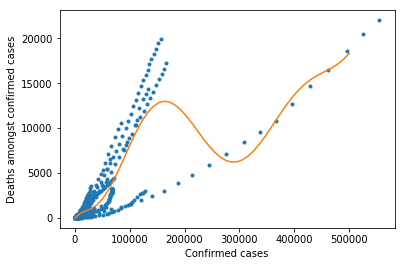

In [15]:
# Plotting the Curve of regression

plt.xlabel("Confirmed cases")
plt.ylabel("Deaths amongst confirmed cases")
plt.plot(x,y,'.')
plt.plot(myline, mymodel(myline))
plt.show()

In [16]:
# Prediction: If a region has 10000 confirmed cases, how many would probably die?

mymodel(10000)

516.6973598069075